<a href="https://colab.research.google.com/github/CAGEHLH/Data-Mining-and-apps/blob/main/Copy_of_Module2_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODULE 2: Preprocessing aka Data Wrangling**

<center>
<img src= "https://miro.medium.com/v2/resize:fit:720/format:webp/0*8cM_wNW7D9vCiAa5.png">
</center>

Data wrangling can easily be one of the most complicated and confusing aspects of data mining. In fact it will take up about 60-70% of the time that you spend working on a dataset. And why is data wrangling so important? Because, yes, GIGO. So, this week, we will look at some very useful ways to make a dataset work for what you want to do with it! This is called preprocessing (or wrangling, or munging, or whatever the latest term-du-jour is going to be). In fact check out this job description: [ETL analyst](https://www.glassdoor.com/Career/etl-analyst-career_KO0,11.htm)--it's ALL ABOUT data wrangling!

<center>
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*Jkhwq0UM8UXe8gBm.png">
</center>

So, in this module, you will learn how to
* Subset and aggregate data to ensure you build the cleanest, most economical dataset possible
* Transform data from one datatype to another
* You have already learned how to clean and (somewhat) integrate data in the previous workbook.

These activities are super important BEFORE we even start with any of the "real data mining"

**Be sure to expand all the hidden cells, run all the code, and do all the exercises--you will need the techniques for your lesson planning!**


##**The Goal**
Big datasets are, well, big. We aren't talking about thousands of rows and 10 or so attributes (aka features, dimensions, or variables); we are talking about billions of rows with many thousands of dimensions. Think all-purchases-on-Amazon.com-the-Saturday-before-Christmas big.

If you try to process that much data on your computer, guess what happens?

<center>
<img src="https://t4.ftcdn.net/jpg/05/59/39/65/360_F_559396565_1OMlX6HmsVNNuTLIBKXFQibqycB2vXQg.jpg">
</center>

I will neither confirm nor deny that I may be speaking from experience. Ahem.

So, in terms of big datasets, **BIGGER** does **NOT** mean **BETTER**. Instead, you'll want to think critically about what data from the big pool you need for your analysis and then work with only that subset.

**To get started:**
* **SKIM** [this post](https://medium.com/almabetter/data-preprocessing-techniques-6ea145684812) to get a sense of what lies ahead. We will come back to many of the techniques mentioned in this post, especially the linguistic ones, when we discuss Natural Language Processing.
* **READ** [this blog post](https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/) to see the most important data wrangling strategies in action.
* **WATCH** the video below. This will give you a great overview of how to deal with any issues you may encounter in your dataset


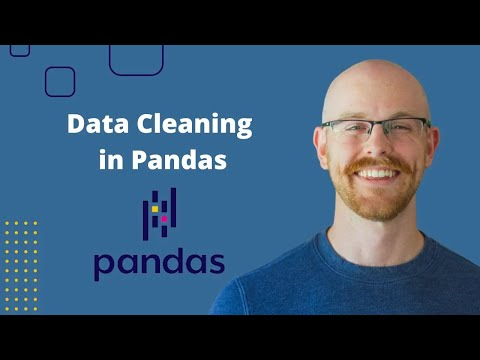

In [2]:
from IPython.display import YouTubeVideo # This is the library I am calling to show you the YouTube video below
YouTubeVideo('bDhvCp3_lYw')

#**0. Preparation and Setup**
We are working with our adult dataset again, so we're loading our libraries and our dataset just like last time.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading in the data as adult dataframe
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified24.csv")

#Verifying that we can see the data
adult.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


#**1. Reducing the Dataset (and then some ...)**


So, the idea is to reduce the dataset with which you are working to the smallest possible size and include ONLY the attributes AND the rows
that are useful and meaningful. This requires editing your dataset:

1. When you reduce the number of attributes or the number of rows, this is called **SUBSETTING**
3. When you summarize rows based on a common attribute (like, "all married people" or "all people under 17"), that is called **AGGREGATION**

There are some even fancier ways of determining how to reduce data. These are  called **[DIMENSIONALITY REDUCTION](https://www.geeksforgeeks.org/dimensionality-reduction/)**. Because they are somewhat advanced (and often not too practical), we will return to them later.

The goal is to think critically (and do some math) about what the best attributes and rows are to include BEFORE you start processing your data. In other words: **PRE-PROCESSING**.

Let's get started!

##**1.1 Slicing and Subsetting**
Slicing and subsetting are related. While Slicing requires indexing (i.e. using the absolute row and column numbers, starting with 0), subsetting does not require indexing.

##**Slicing Magic: The iloc Operator**

**iloc** allows you to define exactly the "fields" that you want to see:

* `df.iloc[0:5,]` shows you the ROWS with the indices 0 through 4 (the first 5)
* `df.iloc[:,0:5]` shows you the first five COLUMNS
* `df.iloc[0:5,0:5]` shows you the first five ROWS and the first five COLUMNS

Practice this below (remember to click on the "start" button to execute the code):

In [8]:
# Looking at only the first 5 rows
adult.iloc[0:5,]

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


Now, use the field below to display only the first five columns

In [7]:
adult.iloc[:,0:5]

,age,workclass,education,educationyears,maritalstatus
0,39,State-gov,Bachelors,13,Never-married
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse
2,38,Private,HS-grad,9,Divorced
3,53,Private,11th,7,Married-civ-spouse
4,28,Private,Bachelors,13,Married-civ-spouse
...,...,...,...,...,...
24995,41,Private,10th,6,Married-civ-spouse
24996,19,Private,HS-grad,9,Never-married
24997,33,Private,HS-grad,9,Divorced
24998,21,?,Some-college,10,Never-married


And now the first five columns and the first five rows:

In [6]:
adult.iloc[0:5,0:5]

,age,workclass,education,educationyears,maritalstatus
0,39,State-gov,Bachelors,13,Never-married
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse
2,38,Private,HS-grad,9,Divorced
3,53,Private,11th,7,Married-civ-spouse
4,28,Private,Bachelors,13,Married-civ-spouse


##Your Turn##
Now use the code field below to save the first five columns and the first five rows into their own dataframe like this:

`adult_[yourname]_short = adult.iloc[` ... followed by the actual iloc code and then display the contents:

In [13]:
adult_Carla_short = adult.iloc[0:5,0:5]

##**1.2 Subsetting**
Subsetting does not require knowing the index numbers for rows or columns. Instead, it sets up row-based filters. For more about subsetting, click [here](https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/) or continue below.

What if we want to see only the people who are 90 years old?

In [ ]:
adult[adult['age'] == 90] # NOTE here that == means "equal to"; it is NOT the mathematical equality operator!

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
222,90,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,40,United-States,36040
1040,90,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,40,United-States,24955
1935,90,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,43154
2303,90,Private,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,29655
2891,90,Private,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,40,Puerto-Rico,20750
4070,90,Private,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,40,United-States,47745
4109,90,?,Bachelors,13,Widowed,?,Other-relative,White,Female,10,United-States,28674
5104,90,Private,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,24933
5272,90,Private,9th,5,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,40440
5370,90,Local-gov,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,60,United-States,119802


Now use <= 20 to find all the people who are younger than or equal to 20:

In [14]:
adult[adult['age'] <= 20]

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
26,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,40,United-States,20810
31,20,Private,Some-college,10,Never-married,Sales,Own-child,Black,Male,44,United-States,34800
37,19,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,25,United-States,42796
51,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,30,?,47875
70,19,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,32,United-States,41013
...,...,...,...,...,...,...,...,...,...,...,...,...
24954,17,Private,11th,7,Never-married,Adm-clerical,Own-child,White,Male,16,United-States,46099
24960,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,40,?,44815
24963,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,50,United-States,42434
24982,20,Private,Some-college,10,Never-married,Sales,Other-relative,White,Male,20,United-States,32256


How about all the people who are older than 75?

In [15]:
adult[adult['age'] > 75]

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
74,79,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,20,United-States,49908
100,76,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,153930
222,90,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,40,United-States,36040
316,77,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,41079
324,76,Self-emp-not-inc,Masters,14,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,22533
...,...,...,...,...,...,...,...,...,...,...,...,...
24238,90,?,1st-4th,2,Widowed,?,Not-in-family,Black,Female,40,United-States,46086
24280,82,Self-emp-inc,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,35200
24395,83,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,55,United-States,128397
24405,76,?,11th,7,Widowed,?,Other-relative,White,Female,16,United-States,37355


If you are subsetting with strings, the strings need to be in single or double quotes. Below, we are looking for everyone with a Bachelors degree:

In [16]:
adult[adult['education'] == 'Bachelors']

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,87200
11,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,189843
...,...,...,...,...,...,...,...,...,...,...,...,...
24978,48,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,50,United-States,42320
24981,43,Self-emp-inc,Bachelors,13,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Male,45,India,36018
24983,40,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,75,United-States,199107
24986,33,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,40,United-States,36303


##Your Turn
Find all the people in the United-States. Then, find all the people from Cuba!

In [17]:
adult[adult['nativecountry']== 'United-States']

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,36970
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,60,United-States,26739
24996,19,Private,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,40,United-States,43783
24997,33,Private,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,42,United-States,22932
24998,21,?,Some-college,10,Never-married,?,Unmarried,White,Male,40,United-States,34094


In [18]:
adult[adult['nativecountry']== 'Cuba']

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429
81,52,Private,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,40,Cuba,38723
638,47,Self-emp-inc,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,50,Cuba,38773
701,31,Private,Bachelors,13,Widowed,Sales,Unmarried,White,Female,40,Cuba,32584
1237,41,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Other-relative,White,Female,40,Cuba,23246
...,...,...,...,...,...,...,...,...,...,...,...,...
22181,27,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,Cuba,60611
22954,34,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,45,Cuba,23933
23503,39,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,40,Cuba,31304
23631,53,Private,Some-college,10,Separated,Adm-clerical,Own-child,White,Male,40,Cuba,27039


##**1.3 Building your own reduced dataset**
Now you have all the tools you need to reduce your dataset (without changing its values--we'll do that in our next step) to a size that's

1. Manageable for your hardware
2. Practical for you to work with

One of the WORST things you can do to yourself, your computer, and your instructor is to keep working with the HUGE dataset. That often leads to confusion and doesn't work well. Use **discernment and critical thinking** when working with data. Your future employer will thank you!

Below are some of the techniquest that will help you:

In [19]:
# Selecting multiple columns at the same time extracts a new DataFrame from your existing DataFrame.
# For selection of multiple columns, the syntax is: square-brace selection with a list of column names,
# e.g. data[['column_name_1', 'column_name_2']]
adult[['age','education','sex']]

,age,education,sex
0,39,Bachelors,Male
1,50,Bachelors,Male
2,38,HS-grad,Male
3,53,11th,Male
4,28,Bachelors,Female
...,...,...,...
24995,41,10th,Male
24996,19,HS-grad,Male
24997,33,HS-grad,Female
24998,21,Some-college,Male


In [26]:
reduced_data = adult[['age','education','sex']]

In [25]:
reduced_data = adult[['maritalstatus', 'workclass']]

In [27]:
# Alternately, you can use numeric indexing with the iloc selector and a list of column numbers, e.g. data.iloc[:, [0,1,20,22]]
# This allows you to specify colums, as well
adult.iloc[0:5,[0,1,7,10,11]]

,age,workclass,race,nativecountry,incomeUSD
0,39,State-gov,White,United-States,43747
1,50,Self-emp-not-inc,White,United-States,38907
2,38,Private,White,United-States,25055
3,53,Private,Black,United-States,26733
4,28,Private,Black,Cuba,23429


**AAAAAAND**, as they say, the piece de resistance: Combining row filters and column filters!

In [28]:
adult[adult['education'] == 'Bachelors'].iloc[0:5,[0,1,2,10,11]]

,age,workclass,education,nativecountry,incomeUSD
0,39,State-gov,Bachelors,United-States,43747
1,50,Self-emp-not-inc,Bachelors,United-States,38907
4,28,Private,Bachelors,Cuba,23429
9,42,Private,Bachelors,United-States,87200
11,30,State-gov,Bachelors,India,189843


##Your Turn
Now, complete the code below to build an adult_small dataframe with rows 70-80 and all columns. You will need this dataframe later. (REMEMBER that the index numbers start with 0!!!!!!)

In [29]:
adult[adult['age'] <=20].iloc[0: , 0:70]

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
26,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,40,United-States,20810
31,20,Private,Some-college,10,Never-married,Sales,Own-child,Black,Male,44,United-States,34800
37,19,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,25,United-States,42796
51,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,30,?,47875
70,19,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,32,United-States,41013
...,...,...,...,...,...,...,...,...,...,...,...,...
24954,17,Private,11th,7,Never-married,Adm-clerical,Own-child,White,Male,16,United-States,46099
24960,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,40,?,44815
24963,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,50,United-States,42434
24982,20,Private,Some-college,10,Never-married,Sales,Other-relative,White,Male,20,United-States,32256


## **1.4. Aggregation and Dimensionality Reduction**
So far, we have learned the mechanics of making our datasets smaller based on practical deliberations--specifically, what columns and what rows we want in order to produce a valid analysis. The goal of Dimensionality Reduction is similar: To make our dataset smaller, so it's easier to handle. However, the reasons are different.

With Dimensionality Reduction, we are looking at **the data themselves** to show us ways in which they can be summarized and simplified. This can happen as follows:
- Column-based: Eliminate attributes that are bascially duplicates of one another
- Row-based: Aggregate similar attribute levels in one level
- Binning and Bucketing
- Normalization of values

We will learn about the first two bullet points below; we will come back to the last two bullet points once we have stepped through data transformation.

###Column-Based Dimensionality Reduction###
In the adult dataset, 'maritalstatus' and 'relationship' look very closely related. If there is a 1:1 relationship between all data values (or at least most of them), this means that the information is really duplicate, so we can choose to eliminate one of these columns.

Let's see if we need both of them.

In [30]:
household=adult[['relationship', 'maritalstatus']]
household.groupby('relationship').sum()

,maritalstatus
relationship,
Husband,Married-civ-spouseMarried-civ-spouseMarried-ci...
Not-in-family,Never-marriedDivorcedMarried-spouse-absentNeve...
Other-relative,Married-civ-spouseNever-marriedNever-marriedNe...
Own-child,Never-marriedNever-marriedNever-marriedNever-m...
Unmarried,Never-marriedDivorcedSeparatedDivorcedNever-ma...
Wife,Married-civ-spouseMarried-civ-spouseMarried-AF...


The output shows us that we have many different values in 'maritalstatus' that are tied to one value in 'relationship.' In relational database terms (for those of you who have taken a database class), this is basically a many-to-one relationship. What we are looking for is a one-to-one relationship. So, 'maritalstatus' and 'relationship' won't work.

What if we look at this relationship the other way around, using 'maritalstatus' on the left, though?

In [31]:
household.groupby('maritalstatus').sum()

,relationship
maritalstatus,
Divorced,Not-in-familyUnmarriedUnmarriedNot-in-familyOw...
Married-AF-spouse,WifeWifeWifeHusbandHusbandHusbandWifeOwn-child...
Married-civ-spouse,HusbandHusbandWifeWifeHusbandHusbandHusbandHus...
Married-spouse-absent,Not-in-familyNot-in-familyUnmarriedNot-in-fami...
Never-married,Not-in-familyNot-in-familyOwn-childNot-in-fami...
Separated,UnmarriedUnmarriedOwn-childUnmarriedOther-rela...
Widowed,UnmarriedUnmarriedNot-in-familyNot-in-familyUn...


Let's try setting a matrix that shows all unique combinations of 'relationship' and 'maritalstatus'. We will use relationship as index and use apply and lambda to sort maritalstatus according to that index.

In [32]:
household2 = household.groupby('relationship').apply(lambda x: x['maritalstatus'].unique())
household2

relationship
Husband                     [Married-civ-spouse, Married-AF-spouse]
Not-in-family     [Never-married, Divorced, Married-spouse-absen...
Other-relative    [Married-civ-spouse, Never-married, Separated,...
Own-child         [Never-married, Divorced, Married-civ-spouse, ...
Unmarried         [Never-married, Divorced, Separated, Widowed, ...
Wife                        [Married-civ-spouse, Married-AF-spouse]
dtype: object

Can you turn this around and use 'maritalstatus' as index? Use the field below.

In [33]:
adult['maritalstatus']

0             Never-married
1        Married-civ-spouse
2                  Divorced
3        Married-civ-spouse
4        Married-civ-spouse
                ...        
24995    Married-civ-spouse
24996         Never-married
24997              Divorced
24998         Never-married
24999    Married-civ-spouse
Name: maritalstatus, Length: 25000, dtype: object

So, we've looked at the connection between 'relationship' and 'maritalstatus' from all different sides--and we are still finding these one-to-many relationships that go both ways. Unless we join each unique value from one attribute with each unique value in the other attribute into the same column, we will need to keep both columns.

Let's see if there is a better connection between 'educationyears' and 'education.'

In [34]:
degree=adult[['educationyears', 'education']]
# degree.sort_values('educationyears')  # This gives us the entire list sorted, but we want to display the unique values
# degree.groupby('educationyears').sum() # That's what we had before--we can do better!

# Let's try setting a matrix that is indexed by educationyears. This is what apply and lambda x do.
degree2 = degree.groupby('educationyears').apply(lambda x: x['education'].unique())
degree2

educationyears
1        [Preschool]
2          [1st-4th]
3          [5th-6th]
4          [7th-8th]
5              [9th]
6             [10th]
7             [11th]
8             [12th]
9          [HS-grad]
10    [Some-college]
11       [Assoc-voc]
12      [Assoc-acdm]
13       [Bachelors]
14         [Masters]
15     [Prof-school]
16       [Doctorate]
dtype: object

##Your Turn

Can you turn this around and use 'education' as index?

In [35]:
adult['education']

0           Bachelors
1           Bachelors
2             HS-grad
3                11th
4           Bachelors
             ...     
24995            10th
24996         HS-grad
24997         HS-grad
24998    Some-college
24999       Bachelors
Name: education, Length: 25000, dtype: object

In contrast to 'maritalstatus' and 'relationship, it seems that 'educationyears' and 'education' are uniquely related. This means we need only one of these columns. Since working with numbers is always easier, we choose 'educationyears' and will eliminate 'education'.
To drop a columns, we can use a couple of methods:
1. We can rebuild the dataframe (or a different dataframe) with only the columns that we want, for example: `adult4=adult[['age','race','sex','educationyears','income']]`--that kind of thing
2. We can use the pandas drop function as explained here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html. Another explanation with a data frame sample is here: http://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/.  This is a better way to modify your dataframe.

Now, let's build an adult4 dataframe that contains all columns of the adult dataframe EXCEPT 'education'

In [ ]:
adult4 = adult.drop(['education'], axis = 1)
adult4

,age,workclass,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429
...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,6,Married-civ-spouse,Transport-moving,Husband,White,Male,60,United-States,26739
24996,19,Private,9,Never-married,Farming-fishing,Own-child,White,Male,40,United-States,43783
24997,33,Private,9,Divorced,Craft-repair,Own-child,White,Female,42,United-States,22932
24998,21,?,10,Never-married,?,Unmarried,White,Male,40,United-States,34094


from matplotlib import pyplot as plt
adult4['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
adult4['educationyears'].plot(kind='hist', bins=20, title='educationyears')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
adult4['hoursperweek'].plot(kind='hist', bins=20, title='hoursperweek')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
adult4['incomeUSD'].plot(kind='hist', bins=20, title='incomeUSD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
adult4.groupby('maritalstatus').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
adult4.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
adult4.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
adult4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
adult4.plot(kind='scatter', x='age', y='educationyears', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
adult4.plot(kind='scatter', x='educationyears', y='hoursperweek', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
adult4.plot(kind='scatter', x='hoursperweek', y='incomeUSD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
adult4['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
adult4['educationyears'].plot(kind='line', figsize=(8, 4), title='educationyears')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
adult4['hoursperweek'].plot(kind='line', figsize=(8, 4), title='hoursperweek')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
adult4['incomeUSD'].plot(kind='line', figsize=(8, 4), title='incomeUSD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in adult4.groupby('maritalstatus')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('maritalstatus')
_ = plt.ylabel('relationship')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race'].value_counts()
    for x_label, grp in adult4.groupby('relationship')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('relationship')
_ = plt.ylabel('race')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sex'].value_counts()
    for x_label, grp in adult4.groupby('race')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race')
_ = plt.ylabel('sex')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(adult4['maritalstatus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(adult4, x='age', y='maritalstatus', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(adult4['relationship'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(adult4, x='age', y='relationship', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(adult4['race'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(adult4, x='age', y='race', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(adult4['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(adult4, x='age', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Row-Based Dimensionality Reduction
Along with setting a filter and storing the output in a separate dataframe as we have seen at the beginning of this file, you can also remove rows from a dataframe by using the “drop” function. To do so, you will need to  specify axis=0.

Drop() removes rows based on “labels”, rather than numeric indexing. To delete rows based on their numeric position / index, use iloc to reassign the dataframe values, as in the examples below.

Read more about drop() and axis values (0 or 1) [here](https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/).

In [36]:
#Delete the rows with label 'white'
#For label-based deletion, set the index first on the dataframe:
adult5 = adult
adult5 = adult5.set_index('race')
adult5.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,sex,hoursperweek,nativecountry,incomeUSD
race,,,,,,,,,,,
White,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,43747
White,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,38907
White,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,25055
Black,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,26733
Black,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,23429


In [37]:
# Now we delete the rows where the index shows "White"
adult5 = adult5.drop('White', axis=0) # Delete all rows with label 'White'
adult5.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,sex,hoursperweek,nativecountry,incomeUSD
race,,,,,,,,,,,
Black,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,26733
Black,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,23429
Black,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,16,Jamaica,45531
Black,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Male,80,United-States,167514
Asian-Pac-Islander,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Male,40,India,189843


In [39]:
# We can also delete the rows with labels 0,1,5
adult5 = adult.drop([0,1,5], axis=0)
adult5.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,45531
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,103612


Check out the results above--notice how indices 0,1, and 5 are missing?

##Your Turn

Now, put everything together that you have learned so far, experiment a bit, and then use the space below to build a new adult6 dataframe that contains only rows of male individuals.

In [47]:
adult5 = adult.drop([2,6,8], axis = 0)
adult5.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,36970


In [87]:
adult5 = adult5.drop('Never-married', axis=0)
adult5.head()

KeyError: "['Never-married'] not found in axis"

In [52]:
adult5 = adult
adult5 = adult5.set_index('education')
adult5.head()

,age,workclass,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
education,,,,,,,,,,,
Bachelors,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
Bachelors,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
HS-grad,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
11th,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
Bachelors,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


In [70]:
adult4 = adult.drop(['educationyears'], axis = 1)
adult4

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429
...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,10th,Married-civ-spouse,Transport-moving,Husband,White,Male,60,United-States,26739
24996,19,Private,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,40,United-States,43783
24997,33,Private,HS-grad,Divorced,Craft-repair,Own-child,White,Female,42,United-States,22932
24998,21,?,Some-college,Never-married,?,Unmarried,White,Male,40,United-States,34094


# **2. Transforming Data**
As you have seen, numeric datatypes allow you to do much more fun math than string datatypes. You can count them, sum them, average them, boxplot them ... all that, while string datatypes, well they can be counted, so much is true--but that really is it.

Take a look at this video below to see the next level of Data Wrangling in action--we will be using a few of these functions in the rest of this workbook:

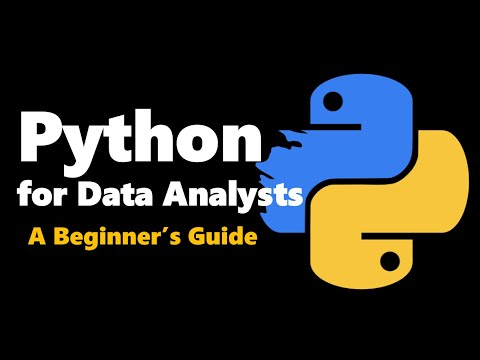

In [ ]:
YouTubeVideo('w3jQyl8ojJA')


We want to transform a categorical attribute, in this case 'race', into a numeric datatype. The Python format for this operation is `DataFrame.astype(dtype, copy=True, errors='raise')`
In our case, this would be something like
* `adult_small.race.astype('int32')`
* `adult_small.race.astype('category')`
* `adult_small.race.astype('category', ordered=True)`

Let's get started. First, let's verify our datatype for 'race'



In [71]:
adult.race.dtypes

dtype('O')

'O' means 'object', which is basically a string value. Let's now transform our 'race' attribute to numeric values. Below are all the steps.

## **2.1 Adding a column with the data we want to transform**
We could theoretically transform the 'race' attribute in place, but if our code causes problems, we could mess up our entire dataframe. So, instead, we will first add a new column into which we will copy the contents of the 'race' attribute. In a second step, we will transform the values in that new column.

Detailed explanations are in the code comments below.

In [73]:
# Creating a new attribute and populating it with the contents of the attribute that we want to transform.
race_num=adult.race

# Adding the new attribute to the dataframe
adult['race_num'] = race_num

# Checking the contents of the new attribute
adult.race_num

0        White
1        White
2        White
3        Black
4        Black
         ...  
24995    White
24996    White
24997    White
24998    White
24999    White
Name: race_num, Length: 25000, dtype: object

In [74]:
# Let's check the shape now. Instead of 12 attributes, we should have 10 rows and 13 columns now because we have built a new race_num attribute
adult.shape

(25000, 13)

In [75]:
# Now that we have the race_num column built, let's check the datatypes of both attributes.
adult.dtypes[['race','race_num']]

race        object
race_num    object
dtype: object

## **2.2 Transforming the values**
To transform an object value to numeric, we need to get the numbers from somewhere. In our case, we will transform the object to category. That gives us the index numbers for the category. Then we will replace the string values with these index numbers for the category--and voila! we have a numeric transformation.
(If you see any attribute replacement warnings as you run the code below, you can ignore them.)

In [78]:
# Here, we convert the race_num values to categorical (to obtain the index numbers)
adult['race_num']= adult['race_num'].astype('category')

# Now we replace the categories with their index numbers, i.e. the category codes
adult['race_num']= adult['race_num'].cat.codes

# Let's see what the datatypes look like now
adult.dtypes[['race','race_num']]

race        object
race_num      int8
dtype: object

In [79]:
# Now let's display the contents of both attributes to double-check
adult[['race','race_num']]

,race,race_num
0,White,4
1,White,4
2,White,4
3,Black,2
4,Black,2
...,...,...
24995,White,4
24996,White,4
24997,White,4
24998,White,4


**SUCCESS!** Now that we have worked the code out for our small proof-of-concept dataframe, we can apply it to the entire adult dataframe.

In [80]:
# First, we back the dataframe up.
adult2=adult

# Now we build the column and copy the original values into it
adult2['race_num'] = adult2.race

# Third, we convert race_num into categorical
adult2['race_num']= adult2['race_num'].astype('category')

# Then, we replace the strings with the category indices
adult2['race_num']= adult2['race_num'].cat.codes

# Now, we check the data types
adult2.dtypes[['race','race_num']]

race        object
race_num      int8
dtype: object

**YAY!** That worked, too. But how did pandas assign the numbers? Let's find out:

In [81]:
# Making a temporary new dataframe because it's so much easier to work with just 2 attributes
race_exploration=adult2[['race','race_num']]
race2=race_exploration.drop_duplicates()
race2.sort_values(by=['race_num'])

,race,race_num
15,Amer-Indian-Eskimo,0
11,Asian-Pac-Islander,1
3,Black,2
50,Other,3
0,White,4


##**Your Turn**
Explain in a couple of complete sentences the logic with which pandas has assigned the numbers for the race_num array.
It looks like to me it assigned the numbers in Alphabetic order starting with 0 as Am and then 1 as As and so on.

#**3. If you get stuck ...**

In [82]:
# 1.1 Slicing and Subsetting
# Now use the code field below to save the first five columns and the first five rows into their own dataframe like this:#
adult_sonja_short = adult.iloc[0:5,0:5]
adult_sonja_short

,age,workclass,education,educationyears,maritalstatus
0,39,State-gov,Bachelors,13,Never-married
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse
2,38,Private,HS-grad,9,Divorced
3,53,Private,11th,7,Married-civ-spouse
4,28,Private,Bachelors,13,Married-civ-spouse


In [83]:
# 1.2 Subsetting
# Now use <= 20 to find all the people who are younger than or equal to 20
adult[adult['age'] <= 20]
# How about all the people who are older than 75?
adult[adult['age'] > 70]
# Find all the people in the United-States
adult[adult['nativecountry'] == 'United-States']
# Then, find all the people from Cuba!
adult[adult['nativecountry'] == 'Cuba']

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429,2
81,52,Private,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,40,Cuba,38723,4
638,47,Self-emp-inc,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,50,Cuba,38773,4
701,31,Private,Bachelors,13,Widowed,Sales,Unmarried,White,Female,40,Cuba,32584,4
1237,41,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Other-relative,White,Female,40,Cuba,23246,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22181,27,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,Cuba,60611,4
22954,34,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,45,Cuba,23933,4
23503,39,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,40,Cuba,31304,2
23631,53,Private,Some-college,10,Separated,Adm-clerical,Own-child,White,Male,40,Cuba,27039,4


In [84]:
# 1.3 Building your own reduced dataset
adult_small = adult.iloc[69:79,]
adult_small

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,40,United-States,42975,4
70,19,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,32,United-States,41013,4
71,31,Private,Bachelors,13,Separated,Sales,Own-child,Black,Female,40,United-States,33571,2
72,29,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,70,United-States,190337,4
73,23,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,40,United-States,23773,4
74,79,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,20,United-States,49908,4
75,27,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,40,Mexico,34334,4
76,40,Private,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,47470,4
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,2,United-States,40188,4
78,18,Private,11th,7,Never-married,Other-service,Own-child,White,Female,22,United-States,44387,4


In [85]:
# 1.4 Column-Based Dimensionality Reduction
#maritalstatus as index
household3 = household.groupby('maritalstatus').apply(lambda x: x['relationship'].unique())
household3

#education as index
degree3 = degree.groupby('education').apply(lambda x: x['educationyears'].unique())
degree3

education
10th             [6]
11th             [7]
12th             [8]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
Assoc-acdm      [12]
Assoc-voc       [11]
Bachelors       [13]
Doctorate       [16]
HS-grad          [9]
Masters         [14]
Preschool        [1]
Prof-school     [15]
Some-college    [10]
dtype: object

In [86]:
# 1.4 Row-Based Dimensionality Reduction
# adult5 dataframe that contains only rows of male individuals.
adult6 = adult
adult6 = adult6.set_index('sex')
adult6 = adult6.drop('Female', axis=0) # Delete all rows with label 'Female'
adult6.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,hoursperweek,nativecountry,incomeUSD,race_num
sex,,,,,,,,,,,,
Male,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,40,United-States,43747,4
Male,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,13,United-States,38907,4
Male,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,40,United-States,25055,4
Male,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,40,United-States,26733,2
Male,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,45,United-States,103612,4


2. Transforming Data
Index numbers are assigned based on the terms in alphabetical order.